The goal of this project is to predict how many calories were burned over the course of a workout. This would be a useful algorithm for an app that was tracking exercise. It could consider the parameters fed into the model and use them to predict how many calories you burned during every workout.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [14]:
filepath = 'exercise_dataset.csv'
df = pd.read_csv(filepath)
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

Miracuosly, there are no missing values and the datatypes appear to be correct.

Let's go ahead and split the data into 3 parts.

In [16]:
df.drop(columns=['Gender', 'Water_Intake (liters)', 'Workout_Type', 'BMI',
                         'Workout_Frequency (days/week)', 'Experience_Level'], inplace=True)

In [17]:
seed = 42
train, val_test = train_test_split(df, train_size=0.7, random_state=seed)
val, test = train_test_split(val_test, train_size=0.5, random_state=seed)
train.shape, val.shape, test.shape

((681, 9), (146, 9), (146, 9))

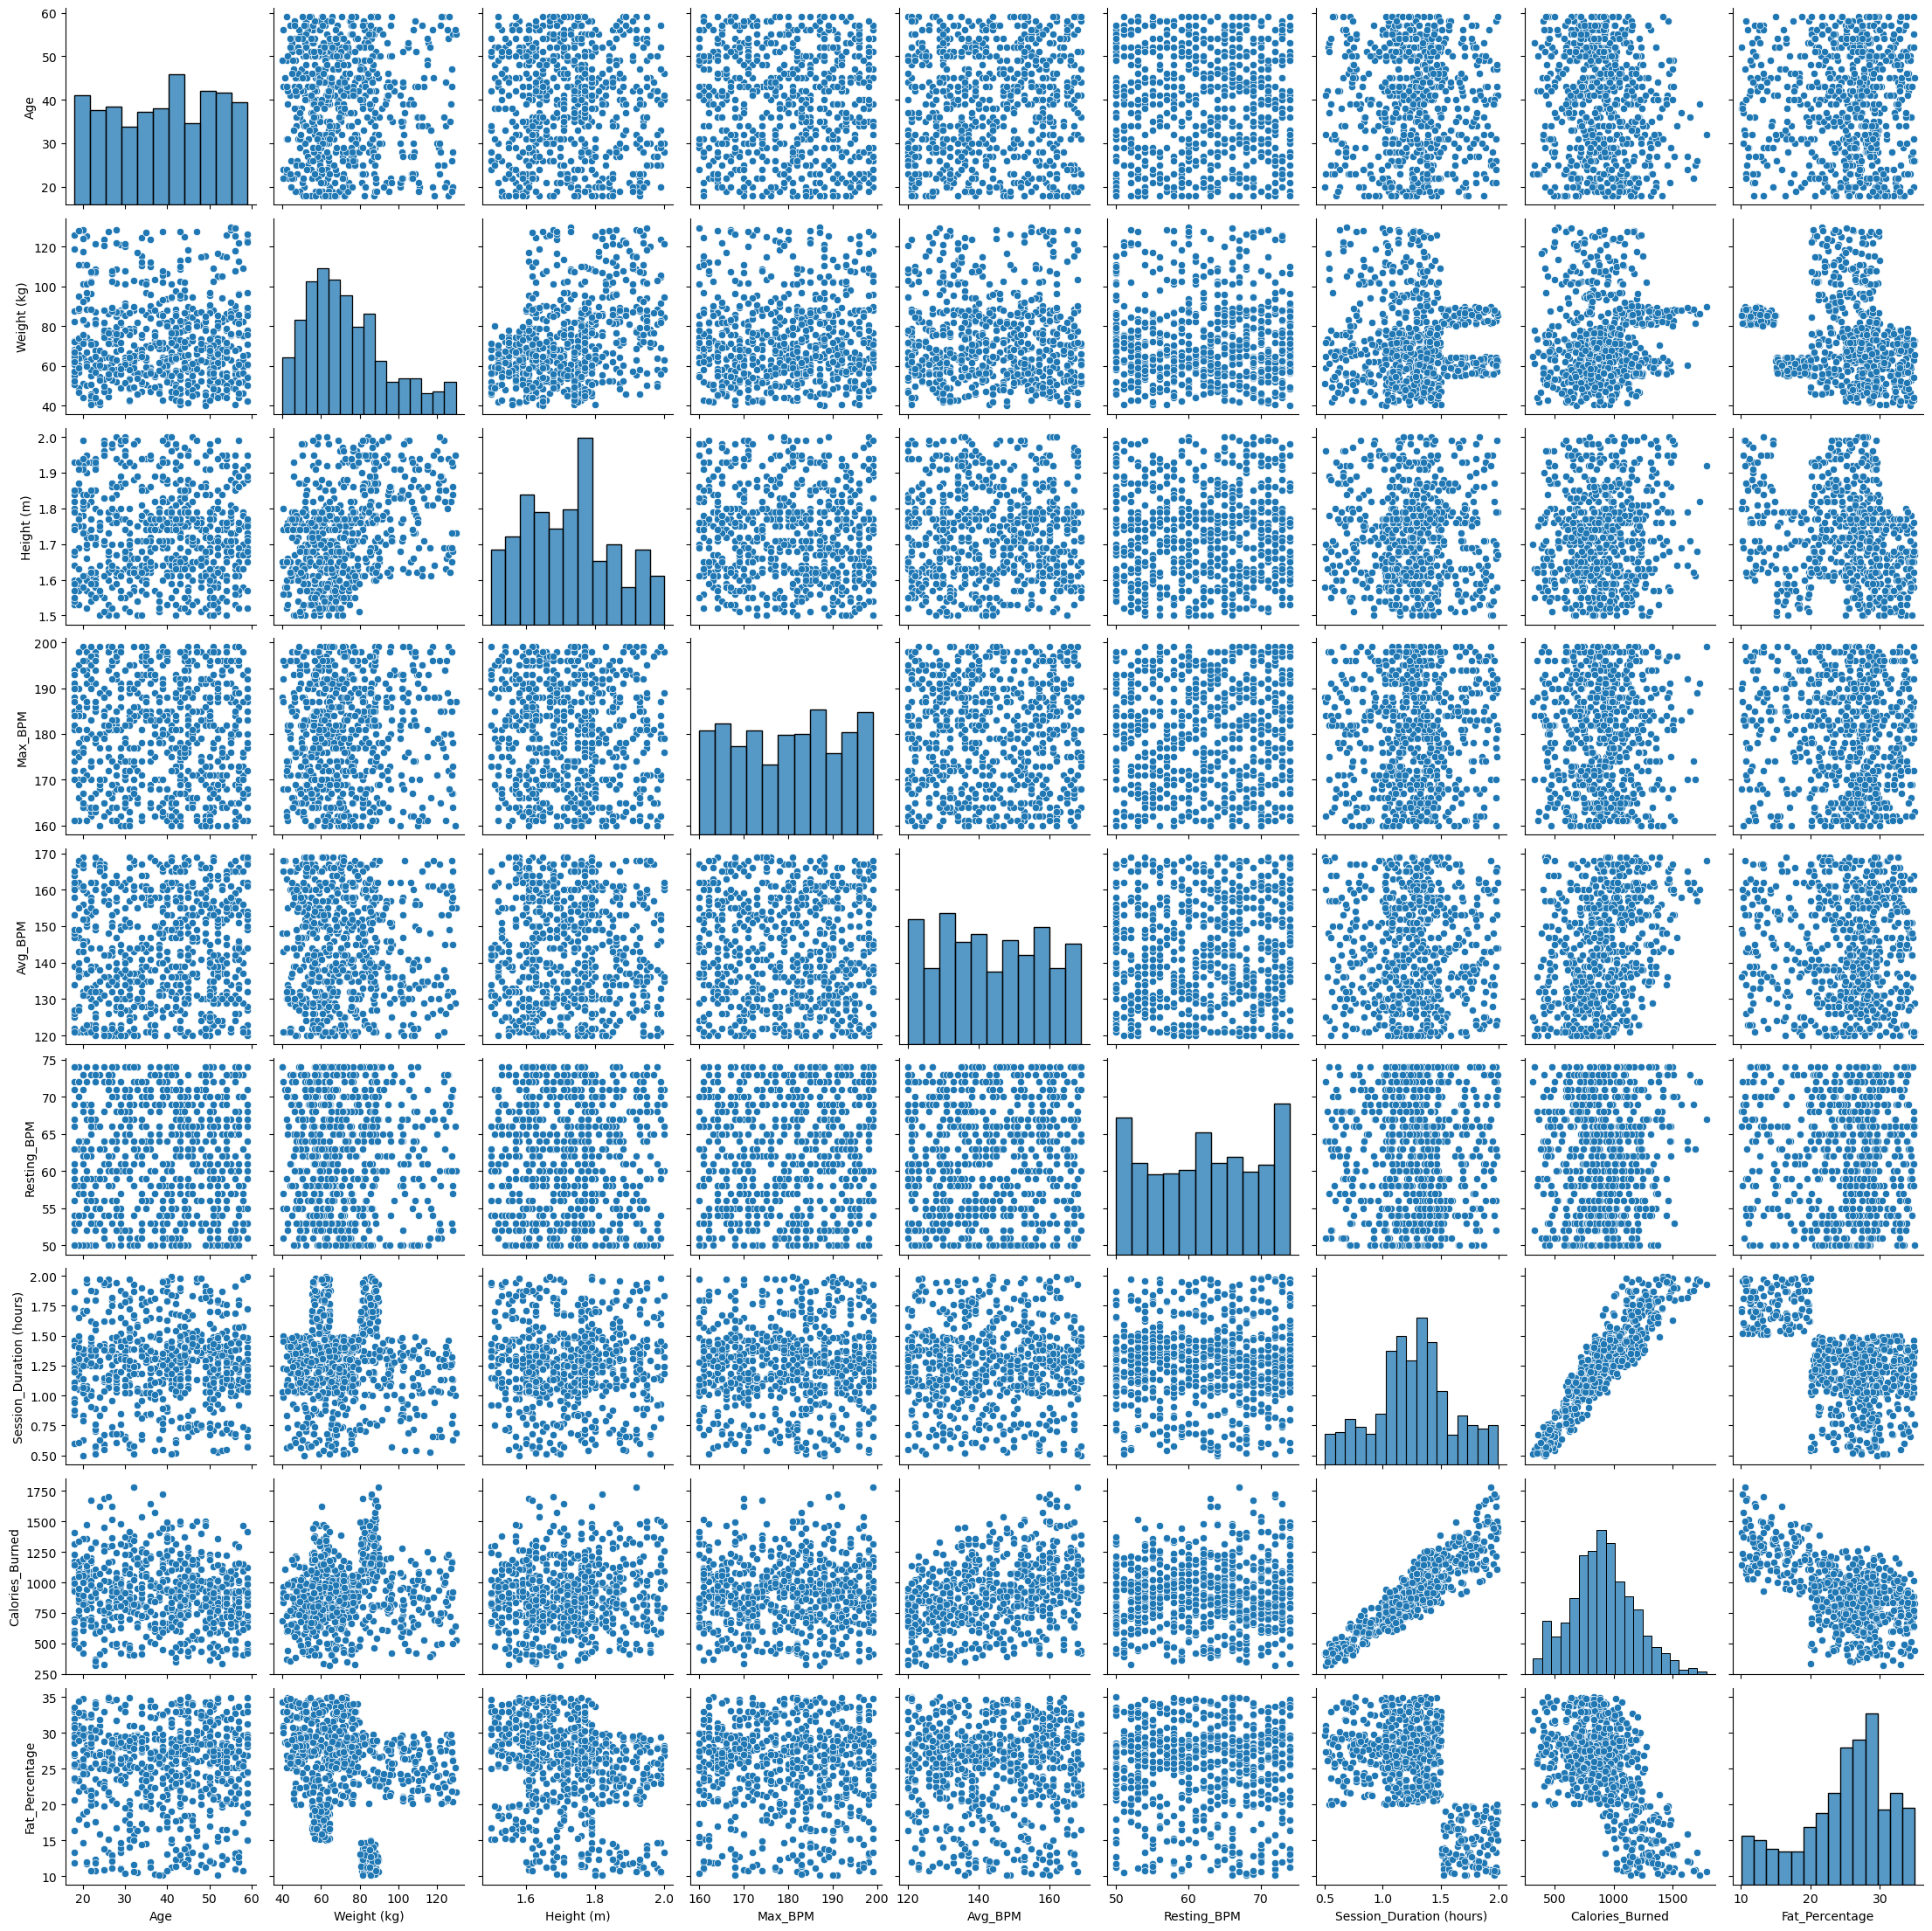

In [18]:
sns.pairplot(train)

Normally I'm a pair plot hater but here we are. I see a number of things:  
1. Weight and BMI are tightly correlated. I'll drop BMI, since it could also overlap with height (many online BMI calculators use your height and weight to offer a loose approximation)
2. Calories appears to have a couple of predictors: workout time, fat percentage, and possibly average BPM and weight
3. I have a couple categorical variables - gender, workout type, and experience level. I'll drop these.
4. I'll also look to drop water intake, since that would be difficult to measure during the workout. I'm isolating variables that we can know at the conclusion of the workout to calculate the calories burned

In [19]:
train.columns = [col.lower() for col in train.columns]
train.head()

,age,weight (kg),height (m),max_bpm,avg_bpm,resting_bpm,session_duration (hours),calories_burned,fat_percentage
514,53,68.1,1.55,164,131,65,1.41,831.0,26.1
583,45,41.2,1.58,195,168,71,1.47,1111.0,28.7
926,39,102.3,1.94,192,134,50,0.89,656.0,22.9
850,48,69.1,1.60,191,166,53,1.34,1001.0,26.1
423,43,95.9,1.85,186,157,64,1.28,995.0,27.7


In [20]:
#to_scale = [col for col in train.columns if col != 'calories_burned']
#ss = StandardScaler()
#train[to_scale] = ss.fit_transform(train[to_scale])
#train.head()

Cool. I'll carry forward with this dataset. I'll create some functions to clean up the data.

Functions are found in prepare.py.

Let's ask some questions of our data and see what we can find.
1. What is the distribution of our target variable (calories burned)?
2. How does calories burned relate to the length of the workout?
3. How does calories burned relate to the fat percentage of the individual?
4. How does calories burned relate to the weight of the individual?

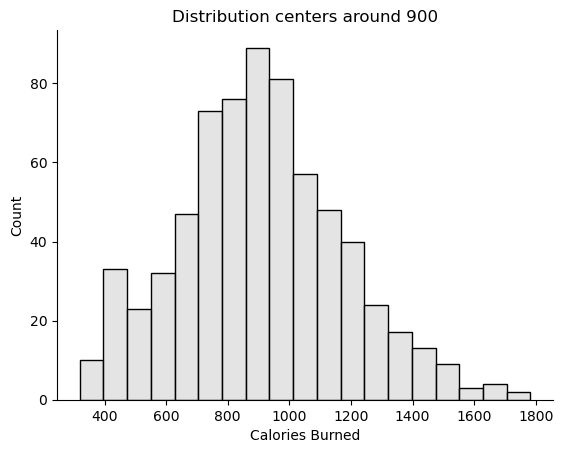

In [32]:
sns.histplot(data=train, x='calories_burned', color='gainsboro', edgecolor='black')
sns.despine()
plt.xlabel('Calories Burned')
plt.ylabel('Count')
plt.title('Distribution centers around 900')
plt.show()

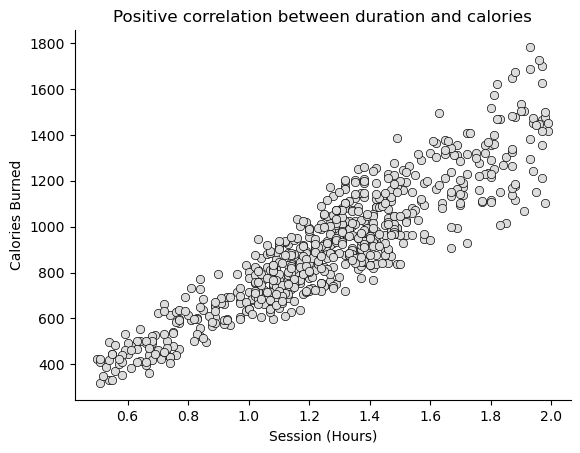

In [33]:
sns.scatterplot(data=train, x='session_duration (hours)', y='calories_burned', color='gainsboro', edgecolor='black')
sns.despine()
plt.xlabel('Session (Hours)')
plt.ylabel('Calories Burned')
plt.title('Positive correlation between duration and calories')
plt.show()

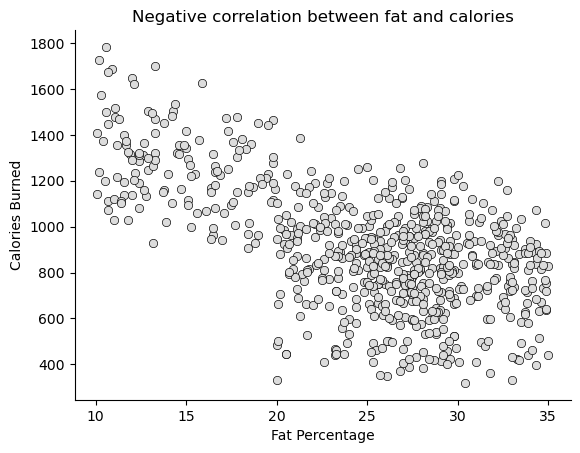

In [35]:
sns.scatterplot(data=train, x='fat_percentage', y='calories_burned', color='gainsboro', edgecolor='black')
sns.despine()
plt.xlabel('Fat Percentage')
plt.ylabel('Calories Burned')
plt.title('Negative correlation between fat and calories')
plt.show()

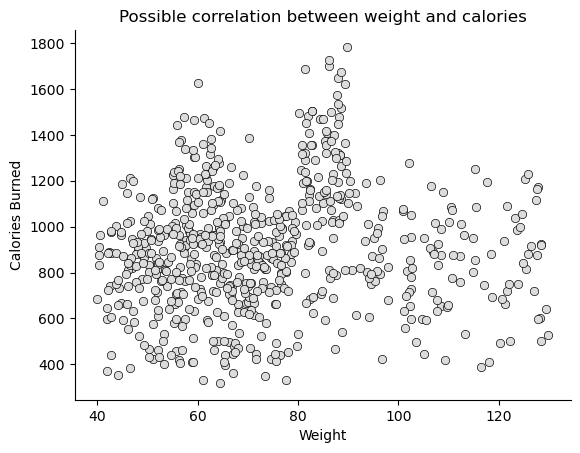

In [38]:
sns.scatterplot(data=train, x='weight (kg)', y='calories_burned', color='gainsboro', edgecolor='black')
sns.despine()
plt.xlabel('Weight')
plt.ylabel('Calories Burned')
plt.title('Possible correlation between weight and calories')
plt.show()